# Phase Plane Portrait

A system of two ODEs

$$ \frac{dx}{dt} = P(x, y), \frac{dy}{dt} = Q(x, y) $$

can be converted to:

$$ \frac{dy}{dx} = \frac{Q(x, y)}{P(x, y)} $$

This ratio is a phase plane trajectory. Let's do a example with simple harmonic oscillator:

$$ \frac{d^2x(t)}{dt^2} + 2 \beta \frac{dx(t)}{dt} + x(t) = 0 $$

Let's convert it to a system of two equations:

$$ \frac{dx(t)}{dt} = v(t), \frac{dv(t)}{dt} = -2 \beta v(t) - x(t) $$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

In [2]:
t, beta = sp.symbols('t beta')
x = sp.Function('x')(t)
x

x(t)

In [3]:
differential_equation = sp.Eq(x.diff(t, 2) + 2*beta * x.diff(t) + x, 0)
differential_equation

Eq(2*beta*Derivative(x(t), t) + x(t) + Derivative(x(t), (t, 2)), 0)

## $\beta = \frac{1}{4}$

In [4]:
beta_val = sp.Rational(1, 4)
diff_eq = differential_equation.subs(beta, beta_val)
diff_eq

Eq(x(t) + Derivative(x(t), t)/2 + Derivative(x(t), (t, 2)), 0)

In [5]:
ics = {x.subs(t, 0): 0, x.diff(t).subs(t, 0): 4}
sol = sp.dsolve(diff_eq, x, ics=ics)
sol

Eq(x(t), 16*sqrt(15)*exp(-t/4)*sin(sqrt(15)*t/4)/15)

In [6]:
quality = 200
start, stop = 0, 15
t_values = np.linspace(start, stop, quality)
x_values = evaluate_function(sol.rhs, t, t_values)

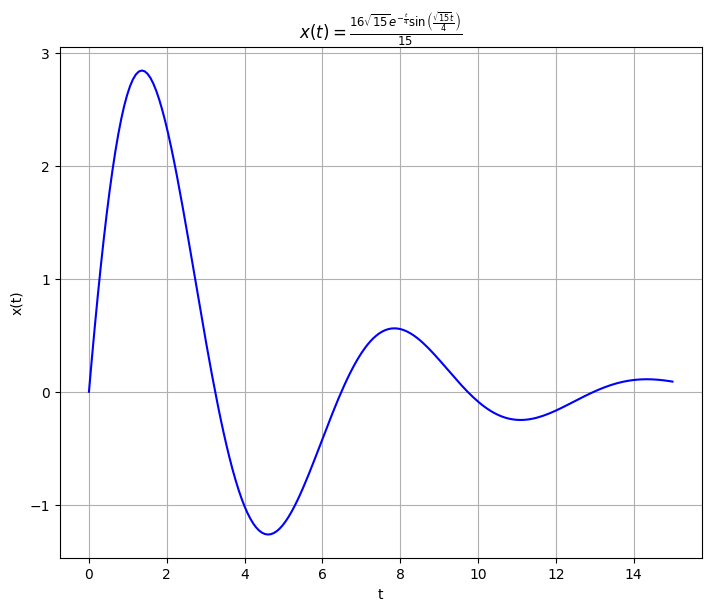

In [7]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(t_values, x_values, color='blue')
axes.set(xlabel='t', ylabel='x(t)', title=f'${sp.latex(sol)}$')
axes.grid(True)

# Vortex Point

Let's introduce a new variable $v(t) = \frac{dx(t)}{dt}$

In [8]:
v = sp.Function('v')(t)
v

v(t)

In [9]:
diff_eq1 = sp.Eq(x.diff(t), v)
diff_eq1

Eq(Derivative(x(t), t), v(t))

In [10]:
diff_eq2 = sp.Eq(v.diff(t), sp.solve(differential_equation, x.diff(t, 2))[0].subs(x.diff(t), v))
diff_eq2

Eq(Derivative(v(t), t), -2*beta*v(t) - x(t))

Let's compute phase portrait for $\beta = 0$

In [11]:
beta_val = 0
# values for phase trajectory
diff_eq = differential_equation.subs(beta, beta_val)
x_0, v_0 = 0, 4
ics = {x.subs(t, 0): x_0, x.diff(t).subs(t, 0): v_0}
sol = sp.dsolve(diff_eq, x, ics=ics)
sol

Eq(x(t), 4*sin(t))

In [12]:
t_a, t_b, quality = 0, 2 * np.pi, 200
t_values = np.linspace(t_a, t_b, quality)
x_trajectory, v_trajectory = phase_trajectory(sol.rhs, t, t_values)
x_values = evaluate_function(sol.rhs, t, t_values)

In [13]:
# values for phase plane
x_eq_beta = diff_eq1.subs(beta, beta_val)
v_eq_beta = diff_eq2.subs(beta, beta_val)
a, b = -5, 5
x_step, v_step = .5, .5
parameters = (a, b, x_step, a, b, v_step)

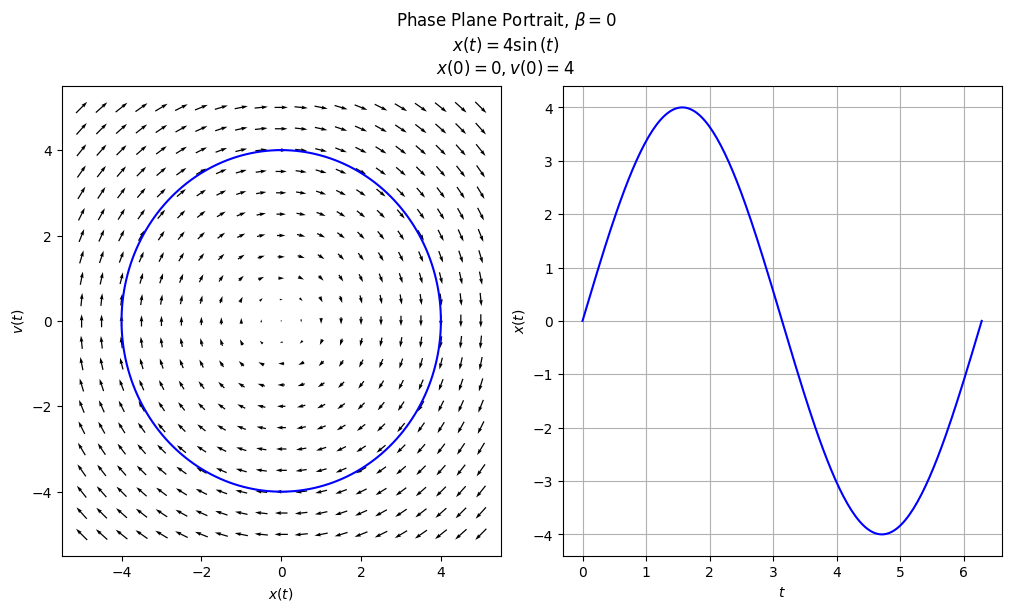

In [14]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
phase_portrait([x_eq_beta.rhs, v_eq_beta.rhs], [x, v], parameters, 
               axes[0], normalize=False, damping_factor=0.5)
axes[0].plot(x_trajectory, v_trajectory, color='blue')
axes[1].plot(t_values, x_values, color='blue')
axes[1].set(xlabel=f'${sp.latex(t)}$', ylabel=f'${sp.latex(x)}$')
axes[1].grid()
_=figure.suptitle(f'Phase Plane Portrait, $\\beta = {beta_val}$\n${sp.latex(sol)}$\n$x(0) = {x_0}, v(0) = {v_0}$')

# Focal Point

Let's check phase portrait for $\beta = \frac{1}{4}$ and $\beta = - \frac{1}{4}$

In [15]:
beta_val = sp.Rational(1, 4)
x_eq_beta = diff_eq1.subs(beta, beta_val)
v_eq_beta = diff_eq2.subs(beta, beta_val)

a, b = -5, 5
x_step, v_step = .5, .5
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b, quality = 0, 15, 200
t_values = np.linspace(t_a, t_b, quality)

phase_trajectories = []
for x_0, v_0 in zip([0, 0], [4, -4]):
    diff_eq = differential_equation.subs(beta, beta_val)
    ics = {x.subs(t, 0): x_0, x.diff(t).subs(t, 0): v_0}
    sol = sp.dsolve(diff_eq, x, ics=ics)
    
    x_trajectory, v_trajectory = phase_trajectory(sol.rhs, t, t_values)
    phase_trajectories.append((x_trajectory, v_trajectory))
    if v_0 == 4:
        x_values = evaluate_function(sol.rhs, t, t_values)

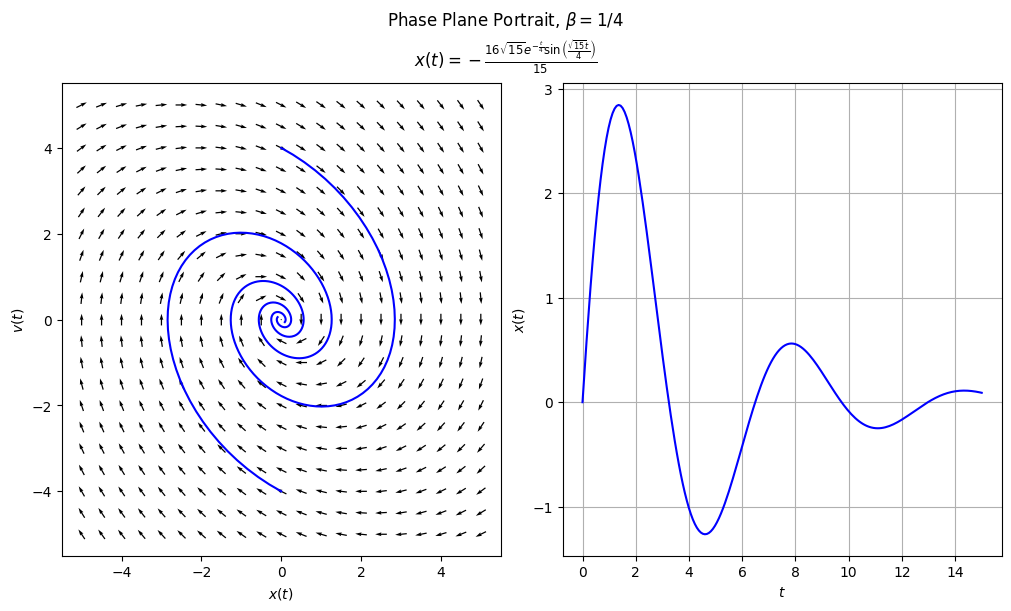

In [16]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
phase_portrait([x_eq_beta.rhs, v_eq_beta.rhs], [x, v], parameters, axes[0], normalize=True)
for x_trajectory, v_trajectory in phase_trajectories:
    axes[0].plot(x_trajectory, v_trajectory, color='blue')
axes[1].plot(t_values, x_values, color='blue')
axes[1].set(xlabel=f'${sp.latex(t)}$', ylabel=f'${sp.latex(x)}$')
axes[1].grid()
_=figure.suptitle(f'Phase Plane Portrait, $\\beta = {beta_val}$\n${sp.latex(sol)}$')

This is a **stable focal point**.

Now we evaluate $\beta = - \frac{1}{4}$

In [17]:
beta_val = -sp.Rational(1, 4)
x_eq_beta = diff_eq1.subs(beta, beta_val)
v_eq_beta = diff_eq2.subs(beta, beta_val)

a, b = -5, 5
x_step, v_step = .5, .5
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b, quality = 0, 15, 200
t_values = np.linspace(t_a, t_b, quality)

phase_trajectories = []
for x_0, v_0 in zip([0, 0], [0.2, -0.2]):
    diff_eq = differential_equation.subs(beta, beta_val)
    ics = {x.subs(t, 0): x_0, x.diff(t).subs(t, 0): v_0}
    sol = sp.dsolve(diff_eq, x, ics=ics)
    
    threshold = ((a, b), (a, b))
    x_trajectory, v_trajectory = phase_trajectory(sol.rhs, t, t_values, axis_thresholds=threshold)
    phase_trajectories.append((x_trajectory, v_trajectory))
    if v_0 == 0.2:
        x_values = evaluate_function(sol.rhs, t, t_values)

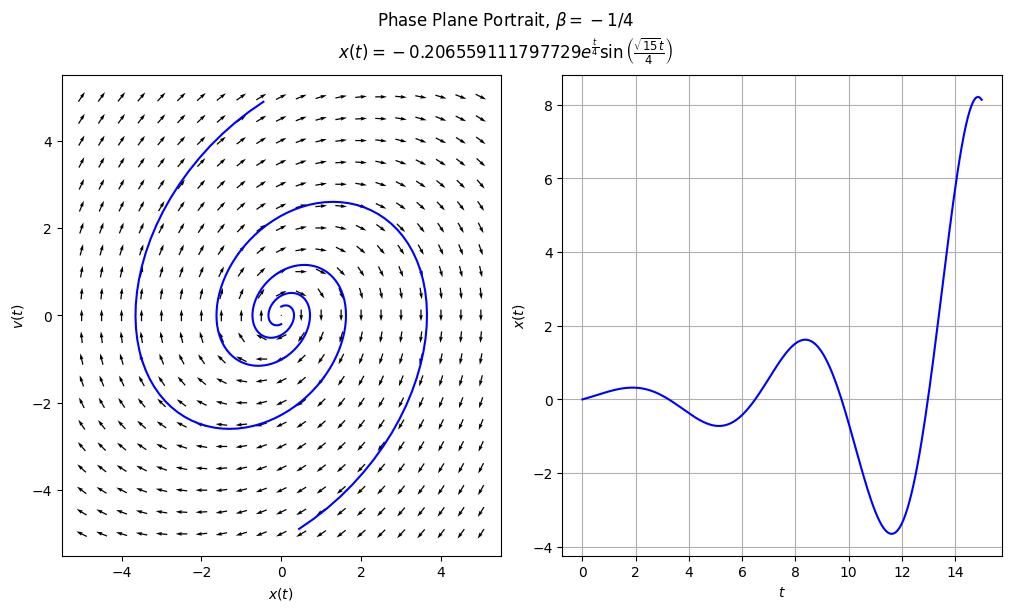

In [18]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
phase_portrait([x_eq_beta.rhs, v_eq_beta.rhs], [x, v], parameters, axes[0], normalize=True)
for x_trajectory, v_trajectory in phase_trajectories:
    axes[0].plot(x_trajectory, v_trajectory, color='blue')
axes[1].plot(t_values, x_values, color='blue')
axes[1].set(xlabel=f'${sp.latex(t)}$', ylabel=f'${sp.latex(x)}$')
axes[1].grid()
_=figure.suptitle(f'Phase Plane Portrait, $\\beta = {beta_val}$\n${sp.latex(sol)}$')

This is an **unstable focal point**.

# Nodal point

Let's check phase portrait for $\beta = 1.1$ and $\beta = - 1.1$. We start with the first one.

In [19]:
beta_val = sp.Rational(11, 10)
x_eq_beta = diff_eq1.subs(beta, beta_val)
v_eq_beta = diff_eq2.subs(beta, beta_val)

a, b = -5, 5
x_step, v_step = .5, .5
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b, quality = 0, 15, 200
t_values = np.linspace(t_a, t_b, quality)

phase_trajectories = []
for x_0, v_0 in zip([0, 0], [4, -4]):
    diff_eq = differential_equation.subs(beta, beta_val)
    ics = {x.subs(t, 0): x_0, x.diff(t).subs(t, 0): v_0}
    sol = sp.dsolve(diff_eq, x, ics=ics)
    
    x_trajectory, v_trajectory = phase_trajectory(sol.rhs, t, t_values)
    phase_trajectories.append((x_trajectory, v_trajectory))
    if v_0 == 4:
        x_values = evaluate_function(sol.rhs, t, t_values)

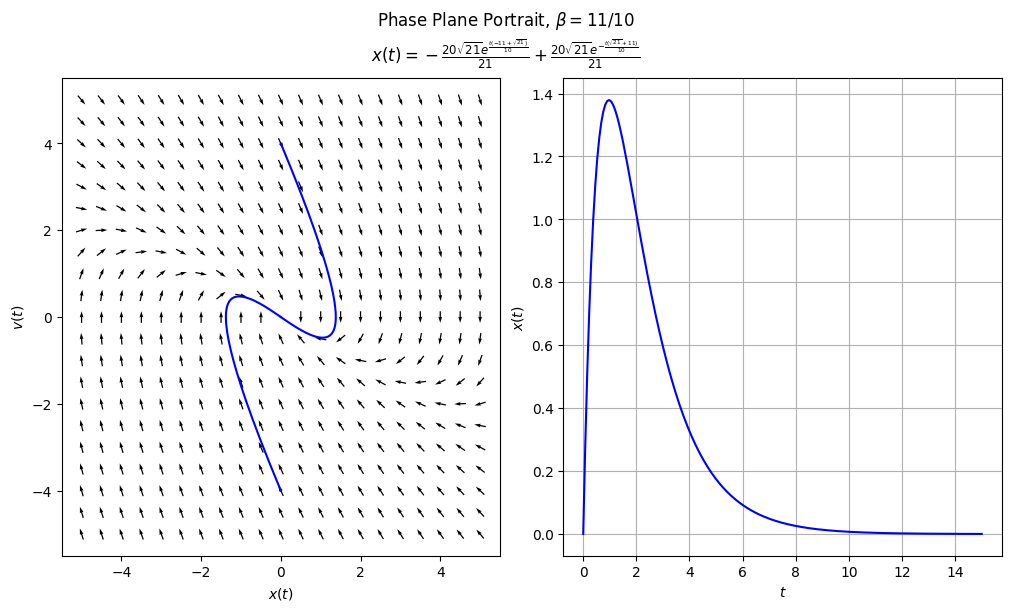

In [20]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
phase_portrait([x_eq_beta.rhs, v_eq_beta.rhs], [x, v], parameters, axes[0], normalize=True)
for x_trajectory, v_trajectory in phase_trajectories:
    axes[0].plot(x_trajectory, v_trajectory, color='blue')
axes[1].plot(t_values, x_values, color='blue')
axes[1].set(xlabel=f'${sp.latex(t)}$', ylabel=f'${sp.latex(x)}$')
axes[1].grid()
_=figure.suptitle(f'Phase Plane Portrait, $\\beta = {beta_val}$\n${sp.latex(sol)}$')

This is a **stable nodal point**.

And now for $\beta = 1.1$

In [21]:
beta_val = -sp.Rational(11, 10)
x_eq_beta = diff_eq1.subs(beta, beta_val)
v_eq_beta = diff_eq2.subs(beta, beta_val)

a, b = -5, 5
x_step, v_step = .5, .5
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b, quality = 0, 15, 200
t_values = np.linspace(t_a, t_b, quality)

phase_trajectories = []
for x_0, v_0 in zip([0.4, -0.4], [0.2, -0.2]):
    diff_eq = differential_equation.subs(beta, beta_val)
    ics = {x.subs(t, 0): x_0, x.diff(t).subs(t, 0): v_0}
    sol = sp.dsolve(diff_eq, x, ics=ics)
    
    threshold = ((a, b), (a, b))
    x_trajectory, v_trajectory = phase_trajectory(sol.rhs, t, t_values, axis_thresholds=threshold)
    phase_trajectories.append((x_trajectory, v_trajectory))
    if v_0 == -0.2:
        x_values = evaluate_function(sol.rhs, t, t_values)

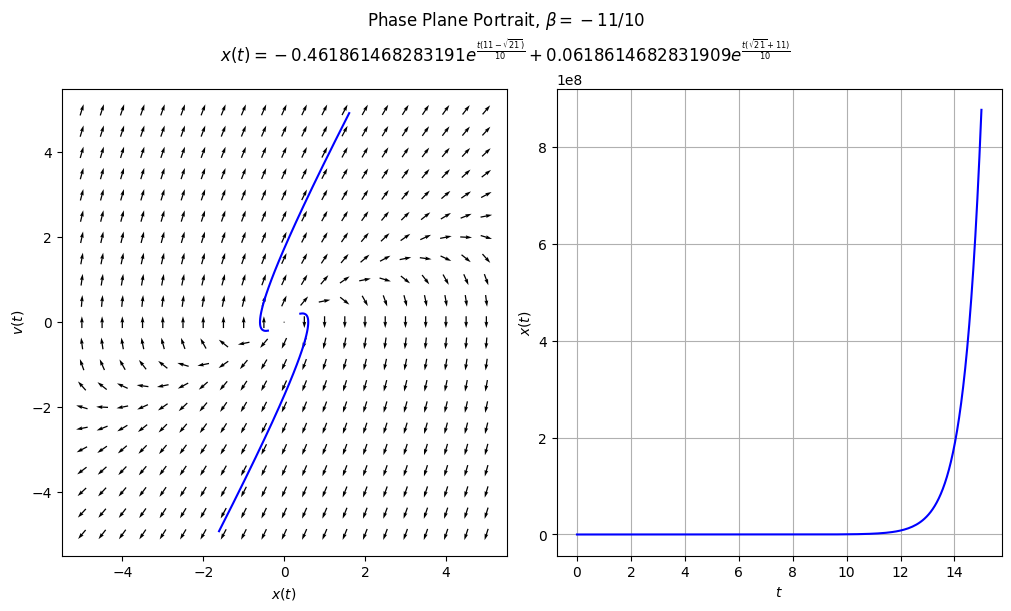

In [22]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
phase_portrait([x_eq_beta.rhs, v_eq_beta.rhs], [x, v], parameters, axes[0], normalize=True)
for x_trajectory, v_trajectory in phase_trajectories:
    axes[0].plot(x_trajectory, v_trajectory, color='blue')
axes[1].plot(t_values, x_values, color='blue')
axes[1].set(xlabel=f'${sp.latex(t)}$', ylabel=f'${sp.latex(x)}$')
axes[1].grid()
_=figure.suptitle(f'Phase Plane Portrait, $\\beta = {beta_val}$\n${sp.latex(sol)}$')

This is an **unstable nodal point**.

# Saddle Point

For this example we create equations proposed by Strogatz.

In [23]:
R = sp.Function('R')(t)
R

R(t)

In [24]:
J = sp.Function('J')(t)
J

J(t)

In [25]:
diff_eq1 = sp.Eq(R.diff(t), 2 * R + J)
diff_eq1

Eq(Derivative(R(t), t), J(t) + 2*R(t))

In [26]:
diff_eq2 = sp.Eq(J.diff(t), -R - 2 * J)
diff_eq2

Eq(Derivative(J(t), t), -2*J(t) - R(t))

In [27]:
a, b = -1, 1
x_step, v_step = .1, .1
parameters = (a, b, x_step, a, b, v_step)
init_r = [-sp.Rational(1, 4), -sp.Rational(27, 100), sp.Rational(27, 100), sp.Rational(1, 4)]
init_j = [1, 1, -1, -1]
t_a, t_b, quality = 0, 2 * np.pi, 200
t_values = np.linspace(t_a, t_b, quality)

threshold = ((a, b), (a, b))
phase_trajectories = []
sol_to_save = None
for r_0, j_0 in zip(init_r, init_j):
    ics = {R.subs(t, 0): r_0, J.subs(t, 0): j_0}
    solutions = sp.dsolve([diff_eq1, diff_eq2], [R, J], ics=ics)
    r_trajectory, j_trajectory = phase_trajectory(solutions[0].rhs, t, t_values,
                                                  axis_thresholds=threshold,
                                                  second_expression=solutions[1].rhs)
    phase_trajectories.append((r_trajectory, j_trajectory))
    if r_0 == -sp.Rational(1, 4) and j_0 == 1:
        sol_to_save = copy(solutions)
        t_for_function = np.linspace(0, 2, quality)
        r_values = evaluate_function(solutions[0].rhs, t, t_for_function)
        j_values = evaluate_function(solutions[1].rhs, t, t_for_function)

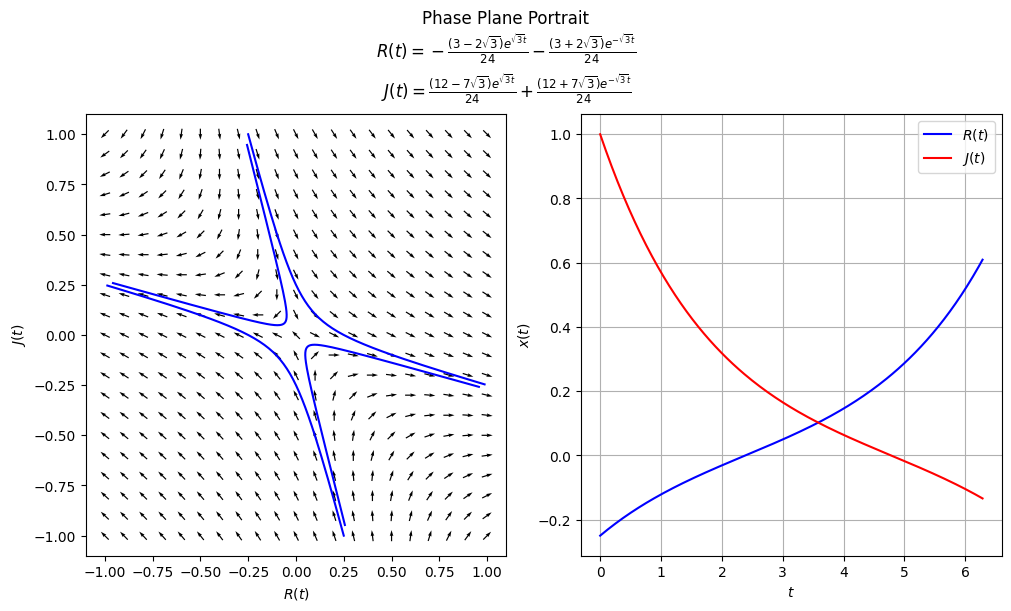

In [28]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
phase_portrait([diff_eq1.rhs, diff_eq2.rhs], [R, J], parameters, axes[0], normalize=True)
for r_trajectory, j_trajectory in phase_trajectories:
    axes[0].plot(r_trajectory, j_trajectory, color='blue')
axes[1].plot(t_values, r_values, color='blue', label=f'${sp.latex(R)}$')
axes[1].plot(t_values, j_values, color='red', label=f'${sp.latex(J)}$')
axes[1].set(xlabel=f'${sp.latex(t)}$', ylabel=f'${sp.latex(x)}$')
axes[1].grid()
axes[1].legend()
_=figure.suptitle(f'Phase Plane Portrait\n${sp.latex(sol_to_save[0])}$\n${sp.latex(sol_to_save[1])}$')

In [29]:
sol_to_save[0]

Eq(R(t), -(3 - 2*sqrt(3))*exp(sqrt(3)*t)/24 - (3 + 2*sqrt(3))*exp(-sqrt(3)*t)/24)

In [30]:
sol_to_save[1]

Eq(J(t), (12 - 7*sqrt(3))*exp(sqrt(3)*t)/24 + (12 + 7*sqrt(3))*exp(-sqrt(3)*t)/24)